# Introduction to pandas
This notebook demonstrates some key functionality of the pandas package.
See: https://pandas.pydata.org/

See here for getting started documentation: https://pandas.pydata.org/docs/getting_started/index.html

You may find these code examples useful: https://github.com/paskhaver/pandas-in-action

For more information on the book Pandas in Action by Boris Paskhaver, see: https://www.manning.com/books/pandas-in-action 

Python for Data Analysis: Data Wrangling with pandas, NumPy, and Jupyter 3rd Edition, by Wes McKinney is a highly recommended reference. The open edition is here: https://wesmckinney.com/book/. The code examples for this book are here: https://github.com/wesm/pydata-book/tree/3rd-edition

In [1]:
import pandas as pd

## Load our data set

See https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html for more info on `read_csv`.

In [2]:
# You may need to modify the filename depending on where you have stored the file.
students_df = pd.read_csv('data/students.csv')

After loading the dataset, we can easily view a representation of it.

In [3]:
students_df  # Notice there's no need to call print

,Student ID,Name,Age,Subject,Year of Study,Country of Origin
0,2703f3f0,Mr Clifford Watson,25.0,English Literature,1.0,Saint Barthelemy
1,a8040287,Elliott Ward,25.0,Computer Science,4.0,Guinea
2,d8da5486,Miss Pauline Dunn,22.0,Engineering,4.0,Afghanistan
3,3ac1b74d,Mr Dominic Mason,22.0,Physics,1.0,Palau
4,67850858,Mrs Melanie Brown,18.0,English Literature,3.0,Algeria
...,...,...,...,...,...,...
96,a8be1ec3,Kelly Foster,22.0,Engineering,1.0,Netherlands
97,3b69ff22,Sara Austin,19.0,Computer Science,34.0,Liechtenstein
98,716fb45f,Miss Grace Miller,22.0,English Literature,4.0,Comoros
99,34b97db2,Miss Lydia Saunders,23.0,Physics,2.0,Faroe Islands


The `read_csv` function automatically creates an index column. You can see the numbers 0 to 100 in the DataFrame above. We can view the index as follows:

In [4]:
students_df.index

RangeIndex(start=0, stop=101, step=1)

We can access rows by index using `loc`:

In [5]:
students_df.loc[0]

Student ID                     2703f3f0
Name                 Mr Clifford Watson
Age                                25.0
Subject              English Literature
Year of Study                       1.0
Country of Origin      Saint Barthelemy
Name: 0, dtype: object

This dataset already has a Student ID column which we could specify as the index column.

In [6]:
students_df = pd.read_csv(
    'data/students.csv',
    index_col='Student ID',
)

Now when we view the DataFrame, we can see that 'Student ID' is being used as the index column.

In [7]:
students_df

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
2703f3f0,Mr Clifford Watson,25.0,English Literature,1.0,Saint Barthelemy
a8040287,Elliott Ward,25.0,Computer Science,4.0,Guinea
d8da5486,Miss Pauline Dunn,22.0,Engineering,4.0,Afghanistan
3ac1b74d,Mr Dominic Mason,22.0,Physics,1.0,Palau
67850858,Mrs Melanie Brown,18.0,English Literature,3.0,Algeria
...,...,...,...,...,...
a8be1ec3,Kelly Foster,22.0,Engineering,1.0,Netherlands
3b69ff22,Sara Austin,19.0,Computer Science,34.0,Liechtenstein
716fb45f,Miss Grace Miller,22.0,English Literature,4.0,Comoros


The index has changed accordingly:

In [8]:
students_df.index

Index(['2703f3f0', 'a8040287', 'd8da5486', '3ac1b74d', '67850858', '62dd3a69',
       '6b22a999', '4b744b9a', '45c54817', '5d5e1224',
       ...
       'f5273fa2', 'e8f05741', '655726b1', '27eca82c', 'bf9937ac', 'a8be1ec3',
       '3b69ff22', '716fb45f', '34b97db2', '34b97db2'],
      dtype='object', name='Student ID', length=101)

Here we access a row by the new index:

In [9]:
students_df.loc['2703f3f0']

Name                 Mr Clifford Watson
Age                                25.0
Subject              English Literature
Year of Study                       1.0
Country of Origin      Saint Barthelemy
Name: 2703f3f0, dtype: object

And we can still access rows by number with `iloc`:

In [10]:
students_df.iloc[0]

Name                 Mr Clifford Watson
Age                                25.0
Subject              English Literature
Year of Study                       1.0
Country of Origin      Saint Barthelemy
Name: 2703f3f0, dtype: object

## Explore our dataset

We can easily find out how many records we loaded uning `len`:

In [11]:
len(students_df)

101

We can examine the first few records in our dataset using `head`. By default, this shows the first five rows in the DataFrame, but we can also specify the number we want as an optional argument.

In [12]:
students_df.head()

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
2703f3f0,Mr Clifford Watson,25.0,English Literature,1.0,Saint Barthelemy
a8040287,Elliott Ward,25.0,Computer Science,4.0,Guinea
d8da5486,Miss Pauline Dunn,22.0,Engineering,4.0,Afghanistan
3ac1b74d,Mr Dominic Mason,22.0,Physics,1.0,Palau
67850858,Mrs Melanie Brown,18.0,English Literature,3.0,Algeria


Similarly, we can vew the last few rows in our dataset using `tail`:

In [13]:
students_df.tail()

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
a8be1ec3,Kelly Foster,22.0,Engineering,1.0,Netherlands
3b69ff22,Sara Austin,19.0,Computer Science,34.0,Liechtenstein
716fb45f,Miss Grace Miller,22.0,English Literature,4.0,Comoros
34b97db2,Miss Lydia Saunders,23.0,Physics,2.0,Faroe Islands
34b97db2,Miss Lydia Saunders,23.0,Physics,2.0,Faroe Islands


We can also get a random sample of records from the DataFrame using `sample`. By default we get one row, but we can specify how many we want.

In [14]:
students_df.sample(10)

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
72324765,Gail Henderson,21.0,Law,1.0,Eritrea
f156e962,Christian Howell-Holt,25.0,Law,2.0,Kyrgyz Republic
f3cbb058,Dr Scott Wilson,18.0,English Literature,4.0,Namibia
7c038fa8,Mr Declan Woods,25.0,Computer Science,1.0,Tuvalu
171006cf,Susan Patel,20.0,English Literature,2.0,Chad
3ac1b74d,Mr Dominic Mason,22.0,Physics,1.0,Palau
ba4fe6e7,Miss Bethany Grant,24.0,Physics,1.0,Aruba
e506b33a,Bethany Davies,21.0,Biology,2.0,Malaysia
c556523c,Dr Samuel Read,21.0,Computer Science,1.0,Bermuda


We can slice DataFrame objects just as we do with lists:

In [15]:
students_df[10:15]

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
2c142f24,Jade Kirby,24.0,Biology,1.0,Fiji
3eec010c,Howard Marshall,NaN,Biology,1.0,Swaziland
f3cbb058,Dr Scott Wilson,18.0,English Literature,4.0,Namibia
6a406b49,Melissa Ali,18.0,Computer Science,1.0,Israel
836d85df,Carolyn Walker,18.0,Mathematics,4.0,Angola


We can get a quick overview of the data using `info`. This shows that we have 101 non-null values of Name, but only 99 non-null values of Age. It looks like we have a couple of missing age values. We can also see that Age and Year of Study are floating-point values and that Name, Subject and Country of Origin have an 'object' Dtype. This is how strings are represented by default.

In [16]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2703f3f0 to 34b97db2
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               101 non-null    object 
 1   Age                99 non-null     float64
 2   Subject            101 non-null    object 
 3   Year of Study      100 non-null    float64
 4   Country of Origin  101 non-null    object 
dtypes: float64(2), object(3)
memory usage: 8.8+ KB


We can use `shape` to determine how many rows and columns we have. Notice that the number of columns does not include the index column.

In [17]:
students_df.shape  # Output: (number of rows, number of columns)

(101, 5)

We used the `index` attribute above to examine the DataFrame index. Here we use `columns` to show our column headings. The index column is not included in the list.

In [18]:
students_df.columns

Index(['Name', 'Age', 'Subject', 'Year of Study', 'Country of Origin'], dtype='object')

We can use dtypes to specifically check the data types:

In [19]:
students_df.dtypes

Name                  object
Age                  float64
Subject               object
Year of Study        float64
Country of Origin     object
dtype: object

To get a basic statistical analysis of the numeric attributes, use `describe`:

In [20]:
students_df.describe()

,Age,Year of Study
count,99.000000,100.00000
mean,23.848485,2.76000
std,22.625777,3.35484
min,5.000000,1.00000
25%,20.000000,1.00000
50%,22.000000,2.00000
75%,24.000000,3.25000
max,245.000000,34.00000


If we have a lot of numeric columns, it can be easier view the transposition of the DataFrame returned by `describe`. We can easily do this using `T`:

In [21]:
students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,99.0,23.848485,22.625777,5.0,20.0,22.0,24.00,245.0
Year of Study,100.0,2.760000,3.354840,1.0,1.0,2.0,3.25,34.0


Here we use `nunique` to see how many unique values each column has.

In [22]:
students_df.nunique()

Name                 100
Age                   10
Subject               10
Year of Study          5
Country of Origin     81
dtype: int64

We can use `value_counts` to count each unique value for a particular column. Here we see that the ages 22 and 21 occur 16 times each.

In [23]:
students_df['Age'].value_counts()

Age
21.0     16
24.0     15
23.0     14
25.0     12
22.0     12
18.0     12
20.0      9
19.0      7
245.0     1
5.0       1
Name: count, dtype: int64

The `value_counts` method works with categorical data as well. Here we see that English Literature is the most commonly studied subject in our dataset.

In [24]:
students_df['Subject'].value_counts()

Subject
English Literature    16
Computer Science      13
Medicine              11
Biology               11
Law                   11
Engineering            9
Physics                8
Mathematics            8
History                7
Art                    7
Name: count, dtype: int64

And here we see that Belize is the most frequently occurring country of origin. The values in this dataset were generated randomly, so there are more countries of origin than we might normally expect.

In [25]:
students_df['Country of Origin'].value_counts()

Country of Origin
Belize              4
Comoros             3
Faroe Islands       2
Marshall Islands    2
Bahrain             2
                   ..
Zimbabwe            1
Guinea              1
Tunisia             1
Burkina Faso        1
Lebanon             1
Name: count, Length: 81, dtype: int64

We can also explore different groupings of data. Here we use `groupby` and `mean` to show the average student age by subject.

In [26]:
students_df.groupby('Subject')['Age'].mean()

Subject
Art                   19.428571
Biology               18.900000
Computer Science      21.153846
Engineering           22.888889
English Literature    22.666667
History               22.714286
Law                   21.818182
Mathematics           48.750000
Medicine              22.181818
Physics               22.750000
Name: Age, dtype: float64

Similarly, here we show the average year of study by country of origin.

In [27]:
students_df.groupby('Country of Origin')['Year of Study'].mean()

Country of Origin
Afghanistan            4.0
Algeria                3.0
Angola                 3.0
Anguilla               4.0
Antigua and Barbuda    3.0
                      ... 
Uruguay                4.0
Uzbekistan             1.0
Vietnam                3.0
Wallis and Futuna      4.0
Zimbabwe               1.0
Name: Year of Study, Length: 81, dtype: float64

### Some basic plotting

Here we use the `plot` method to quickly create a bar chart.

<Axes: xlabel='Age'>

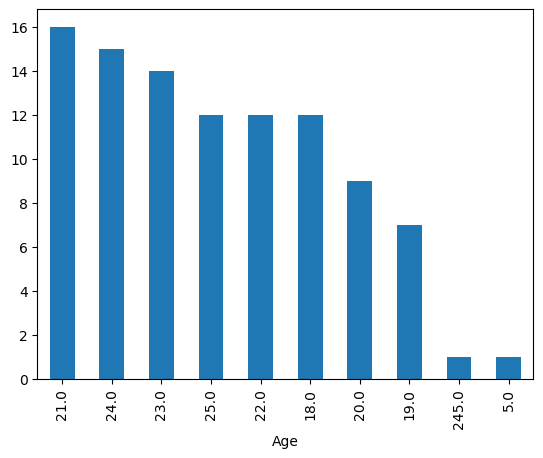

In [28]:
students_df['Age'].value_counts().plot(kind='bar')

Here we do a similar thing, but we're grouping by age and then plotting the size of each grouping. In this case the bars are sorted by age rather than count.

<Axes: xlabel='Age'>

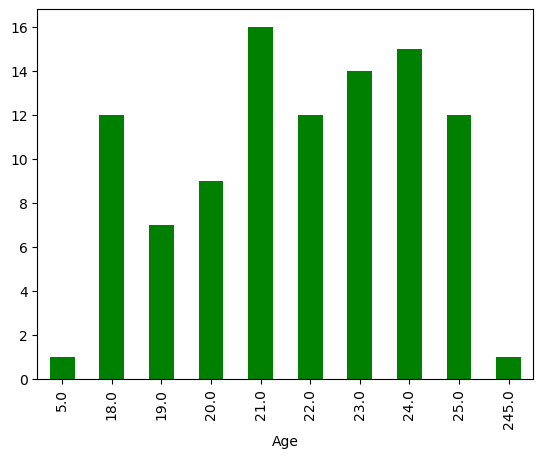

In [29]:
students_df.groupby('Age').size().plot(kind='bar', color='green')

## Clean our data

### Handling missing values
We could run into problems if our DataFrame contains rows with missing data, e.g. if we try to use the data to build machine learning models.

We can find out how many missing values for each column as follows:

In [30]:
students_df.isna().sum()  # isnull does the same thing as isna

Name                 0
Age                  2
Subject              0
Year of Study        1
Country of Origin    0
dtype: int64

We can see which rows contain missing values in any column.

In [31]:
students_df[students_df.isna().any(axis=1)]

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
4b744b9a,Garry Thornton,NaN,English Literature,4.0,Cuba
3eec010c,Howard Marshall,NaN,Biology,1.0,Swaziland
335dd32f,Ruth Miller,18.0,Biology,NaN,Jersey


Or just show rows with missing values in a particular column.

In [32]:
students_df[students_df['Age'].isna()]

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
4b744b9a,Garry Thornton,NaN,English Literature,4.0,Cuba
3eec010c,Howard Marshall,NaN,Biology,1.0,Swaziland


There are two main ways in which we might handle missing values.
1. We could just delete the rows that contain the missing values. This is OK when we have enough data to build an effective machine learning model, even when those rows are deleted.
2. We could fill in (or impute) the missing values by trying to guess the value or by using a sensible default value that won't unduly skew our model. This may enable us to benefit from data that otherwise would be deleted and can be a good approach when data is less plentiful.

### Imputation: filling in missing values
In the examples below, we use `fillna` to fill in the missing 'Age' and 'Years of Study' values with their medians. The median value can be a better choice than the mean value because it is less affected by outliers.

In [33]:
median_age = students_df['Age'].median()
median_age

22.0

In [34]:
students_df['Age'] = students_df['Age'].fillna(median_age)

In [35]:
median_year_of_study = students_df['Year of Study'].median()
median_year_of_study

2.0

In [36]:
students_df['Year of Study'] = students_df['Year of Study'].fillna(median_year_of_study)

Now that we have filled in the missing values, we can confirm that there are no more missing values.

In [37]:
students_df.isna().sum()

Name                 0
Age                  0
Subject              0
Year of Study        0
Country of Origin    0
dtype: int64

### Deleting rows with missing values
We can use `dropna` rather than `fillna` if we want to delete the rows with missing values. In contrast to 'imputation', I like to call this 'amputation', although that's not a commonly used term.

In [38]:
# We've replaced the missing values already, so this line will have no effect:
students_df = students_df.dropna()

# We can also drop rows that contain missing values in specified columns
# students_df = students_df.dropna(subset=['Age', 'Year of Study'])

You might see `inplace=True` being used, as in the examples below. This code works, but it's no more efficient than the equivalent code above, and it's proposed that the inplace parameters will be removed in a future pandas release. See this stack overflow link for more info: https://stackoverflow.com/questions/45570984/in-pandas-is-inplace-true-considered-harmful-or-not

In [39]:
students_df.dropna(subset=['Age'], inplace=True)
students_df.dropna(subset=['Year of Study'], inplace=True)

We had 101 records when we checked above. Here we confirm that we haven't deleted any.

In [40]:
len(students_df)

101

### Checking for outliers
There are various ways in which we could check for outliers. For example, we could visualise the data using a box plot (we'll soon learn more about data visualisation). We could also calculate the mean and the standard deviation and identify values that are more than, say, three standard deviations away from the mean.

For this example, we'll assume ages of less than 17 or greater than 30 should be checked, and that the year of study should be in the range 1 to 4.

In the examples below the vertical bar `|` is the OR operator.

You can also use a single ampersand `&` for AND, and a tilde `~` for NOT.

In [41]:
students_df[(students_df['Age'] < 17) | (students_df['Age'] > 30)]

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
27166ecb,Dr Terry Lewis,245.0,Mathematics,3.0,Fiji
95fadd5e,Sheila Berry,5.0,Biology,1.0,Romania


In [42]:
students_df[(students_df['Year of Study'] < 1) | (students_df['Year of Study'] > 4)]

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
3b69ff22,Sara Austin,19.0,Computer Science,34.0,Liechtenstein


Ages of 245 and 5 both seem unreasonable, as does a year of study of 34. We can again replace these values or filter out the rows that contain them.

Here we replace the age outliers with the median. We do this using `loc` and setting a Boolean condition to identify the values we want to replace.

In [43]:
students_df.loc[(students_df['Age'] < 17) | (students_df['Age'] > 30), 'Age'] = median_age

And here we replace the year of study outliers with the median.

In [44]:
students_df.loc[
    (students_df['Year of Study'] < 1) | (students_df['Year of Study'] > 4), 'Year of Study'
    ] = median_year_of_study

In the example below, we show how to filter out the outliers:

In [45]:
# We have already replaced the outlier values, so this code won't have any effect
students_df = students_df[(students_df['Age'] >= 17) & (students_df['Age'] <= 30)]
students_df = students_df[(students_df['Year of Study'] >= 1) & (students_df['Year of Study'] <= 4)]

In [46]:
# Confirming again that we still have 101 rows
len(students_df)

101

### Modify the datatypes
When we checked the datatypes earlier, we saw that 'Age' and 'Year of Study' were floating point values.  

In [47]:
# Checking the datatypes again
students_df.dtypes

Name                  object
Age                  float64
Subject               object
Year of Study        float64
Country of Origin     object
dtype: object

It probably makes more sense to represent these with integers rather than floating point values. Here we show how to convert them using `astype`.

In [48]:
students_df['Age'] = students_df['Age'].astype(int)
students_df['Year of Study'] = students_df['Year of Study'].astype(int)

In [49]:
# Confirm that 'Age' and 'Year of Study' are now integers
students_df.dtypes

Name                 object
Age                   int32
Subject              object
Year of Study         int32
Country of Origin    object
dtype: object

In [50]:
# The DataFrame also shows 'Age' and 'Year of Study' as integers
students_df.head()

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
2703f3f0,Mr Clifford Watson,25,English Literature,1,Saint Barthelemy
a8040287,Elliott Ward,25,Computer Science,4,Guinea
d8da5486,Miss Pauline Dunn,22,Engineering,4,Afghanistan
3ac1b74d,Mr Dominic Mason,22,Physics,1,Palau
67850858,Mrs Melanie Brown,18,English Literature,3,Algeria


We can also convert the object type column types to strings.

In [51]:
students_df['Name'] = students_df['Name'].astype("string")
students_df['Subject'] = students_df['Subject'].astype("string")
students_df['Country of Origin'] = students_df['Country of Origin'].astype("string")

students_df.dtypes

Name                 string[python]
Age                           int32
Subject              string[python]
Year of Study                 int32
Country of Origin    string[python]
dtype: object

### Identifying duplicates
We can check for duplicates using a combination of `duplicated` and `sum`. The duplicated method returns a series of Boolean `True` or `False` values. `True` if the row is a duplicate of a row above, and `False` otherwise.

Here we show the series of Boolean values. The final `True` shows that the last record is a duplicate.

In [52]:
students_df.duplicated()

Student ID
2703f3f0    False
a8040287    False
d8da5486    False
3ac1b74d    False
67850858    False
            ...  
a8be1ec3    False
3b69ff22    False
716fb45f    False
34b97db2    False
34b97db2     True
Length: 101, dtype: bool

And here we use `sum` to count the number of duplicate rows (`False` is equivalent to `0` and `True` is equivalent to `1`).

In [53]:
students_df.duplicated().sum()

1

We can see the duplicated rows using `loc` (for location) and passing in the True/False values returned by students_df.duplicated().

In [54]:
students_df.loc[students_df.duplicated()]

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
34b97db2,Miss Lydia Saunders,23,Physics,2,Faroe Islands


We can easily remove duplicate rows from the DataFrame using `drop_duplicates`.

In [55]:
students_df = students_df.drop_duplicates()

We started with 101 rows and have just dropped a duplicate row. So we can expect to have 100 rows remaining.

In [56]:
len(students_df)

100

The duplicated row was Miss Lydia Saunders at the bottom of the DataFrame. We can see that it's gone now.

In [57]:
students_df.tail()

,Name,Age,Subject,Year of Study,Country of Origin
Student ID,,,,,
bf9937ac,Mr Victor Smith,20,Law,1,Bangladesh
a8be1ec3,Kelly Foster,22,Engineering,1,Netherlands
3b69ff22,Sara Austin,19,Computer Science,2,Liechtenstein
716fb45f,Miss Grace Miller,22,English Literature,4,Comoros
34b97db2,Miss Lydia Saunders,23,Physics,2,Faroe Islands


### Split the 'Name' column into 'Title', 'Forename', and 'Surname'
Split the name while being sure to handle cases where the title is not present. This function assumes that the name can be split into either two or three parts: optional title + forename + surname. This is a valid assumption for our dataset, but maybe not for other datasets (e.g. where the family name comes before the given name).

In [58]:
def split_name(name):
    """
    Split name into title, forename, and surname. Return these as a tuple.
    The title just gets an empty string if not included in the name.
    """
    parts = name.split()

    if len(parts) == 3:
        title = parts[0]
        forename = parts[1]
        surname = parts[2]
    else:
        title = ''
        forename = parts[0]
        surname = parts[1]

    return title, forename, surname

Apply the function to each name in the DataFrame

In [59]:
students_df[['Title', 'Forename', 'Surname']] = \
     students_df['Name'].apply(lambda name: pd.Series(split_name(name)))

In [60]:
students_df.head()

,Name,Age,Subject,Year of Study,Country of Origin,Title,Forename,Surname
Student ID,,,,,,,,
2703f3f0,Mr Clifford Watson,25,English Literature,1,Saint Barthelemy,Mr,Clifford,Watson
a8040287,Elliott Ward,25,Computer Science,4,Guinea,,Elliott,Ward
d8da5486,Miss Pauline Dunn,22,Engineering,4,Afghanistan,Miss,Pauline,Dunn
3ac1b74d,Mr Dominic Mason,22,Physics,1,Palau,Mr,Dominic,Mason
67850858,Mrs Melanie Brown,18,English Literature,3,Algeria,Mrs,Melanie,Brown


Now that we have Title, Forename and Surname columns, we can use `drop` to remove the redundant Name column.

In [61]:
students_df = students_df.drop(columns=['Name'])

In [62]:
students_df.head()

,Age,Subject,Year of Study,Country of Origin,Title,Forename,Surname
Student ID,,,,,,,
2703f3f0,25,English Literature,1,Saint Barthelemy,Mr,Clifford,Watson
a8040287,25,Computer Science,4,Guinea,,Elliott,Ward
d8da5486,22,Engineering,4,Afghanistan,Miss,Pauline,Dunn
3ac1b74d,22,Physics,1,Palau,Mr,Dominic,Mason
67850858,18,English Literature,3,Algeria,Mrs,Melanie,Brown


Let's see what values we extracted for Title.

In [63]:
students_df['Title'].value_counts()

Title
        67
Mr      13
Miss     7
Dr       7
Mrs      6
Name: count, dtype: int64

## Save the processed dataset
Finally, we will write the processed dataset to its own file.

In [64]:
students_df.to_csv('data/students_processed.csv')

## Questions

### How do I see all of the records in the DataFrame?
You might have noticed that not all of the rows in the DataFrame get displayed when there are many of them. Here we temporarily change the pandas display options so that all rows and columns are printed. Your editior might still truncate the display but in VS Code, for example, you can view the output as a scrollable element or open it in a text editor, or you can change the cell output settings to display more lines.

In [65]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(students_df)

            Age             Subject  Year of Study  \
Student ID                                           
2703f3f0     25  English Literature              1   
a8040287     25    Computer Science              4   
d8da5486     22         Engineering              4   
3ac1b74d     22             Physics              1   
67850858     18  English Literature              3   
62dd3a69     22            Medicine              2   
6b22a999     23         Engineering              2   
4b744b9a     22  English Literature              4   
45c54817     20    Computer Science              2   
5d5e1224     20             History              1   
2c142f24     24             Biology              1   
3eec010c     22             Biology              1   
f3cbb058     18  English Literature              4   
6a406b49     18    Computer Science              1   
836d85df     18         Mathematics              4   
fc4f68b0     23                 Law              3   
41465cf8     25             

Here we explicitly print out all the country names using to_string, e.g to check for spelling errors. This approach might be easier to remember.

In [66]:
print(students_df['Country of Origin'].value_counts().to_string())

Country of Origin
Belize                              4
Comoros                             3
Micronesia                          2
Palau                               2
Chad                                2
Cambodia                            2
Cuba                                2
Bahrain                             2
Cyprus                              2
Marshall Islands                    2
Angola                              2
Tonga                               2
Saint Lucia                         2
Fiji                                2
Netherlands Antilles                2
Israel                              2
Ukraine                             1
Afghanistan                         1
Algeria                             1
Guinea-Bissau                       1
Korea                               1
Haiti                               1
Swaziland                           1
Mayotte                             1
Namibia                             1
Nauru                           

I sometimes use Microsoft's Data Wrangler extension for VS Code. This lets you page through the whole DataFrame.

### How do I reorder the columns?
We can just reassign the DataFrame with the columns in whichever order we prefer.

In [67]:
column_order = ['Title', 'Forename', 'Surname', 'Age', 'Country of Origin', 'Subject', 'Year of Study']
students_df = students_df[column_order]

In [68]:
students_df.head()

,Title,Forename,Surname,Age,Country of Origin,Subject,Year of Study
Student ID,,,,,,,
2703f3f0,Mr,Clifford,Watson,25,Saint Barthelemy,English Literature,1
a8040287,,Elliott,Ward,25,Guinea,Computer Science,4
d8da5486,Miss,Pauline,Dunn,22,Afghanistan,Engineering,4
3ac1b74d,Mr,Dominic,Mason,22,Palau,Physics,1
67850858,Mrs,Melanie,Brown,18,Algeria,English Literature,3
